<a href="https://colab.research.google.com/github/iDreamVA/Project-Assignment/blob/main/CSS113Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Assignment (15%) กลุ่มละ 3 คน  
จงเขียนโปรแกรมในการรับข้อมูลกราฟขนาด N ใดๆ แล้ว
1. หาเส้นทางแบบต้นไม้แผ่ทั่ว (Spanning Tree) ที่เป็นไปได้ เมื่อกําหนดจุดยอดต้น
 ทาง โดยวิธี Depth-first search (DFS) หรือ Breadth-first search (BFS)  
2. หาเส้นทางที่สั่นที่สุด จากจุดยอดต้นทางที่กําหนดไปยังจุดยอดปลายทางที่ กําหนด
โดยวิธี Djikstra's Shortest Path  
3. หาต้นไม้แผ่ทั่วที่มีนํ้าหนักตํ่าาสุดโดยวิธี Prim’s algorithm และ Kruskal’s algorithm
4. วิธีส่ง Code ที่สามารถ run ได้ ไม่มี bugs หรือ errors กําหนดส่ง ภายในวันที่ 25
พ.ย 2568 โดยเป็นการมา demo โปรแกรมให้ดู แบบ onsite และ ทุกคนในกลุ่ม
 จะต้องพร้อมตอบ คําถามต่างๆ  
หมายเหตุ วัน demo จะมี testcase ให้

In [ ]:
import heapq
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
class Graph:
    def __init__(self):
        self.adj = {}
        self.edge_set = set()

    def add_edge(self, u, v, weight=1):
        key = tuple(sorted((str(u), str(v))))
        if key in self.edge_set: return False
        self.edge_set.add(key)
        self.adj.setdefault(u, []).append((v,weight))
        self.adj.setdefault(v, []).append((u,weight))
        return True

# input u v weight

In [ ]:
def read_graph_input():
    G = Graph()
    print("Enter edges: u v weight (type 'done' to finish)")
    while True:
        line = input(">> ").strip()
        if line.lower() == "done": break
        try:
            u,v,weight = line.split()
            weight = float(weight) if '.' in weight else int(weight)
        except:
            print("[ERROR] Format must be: u v weight"); continue
        if not G.add_edge(u,v,weight):
            print(f"[DUPLICATE] Edge ({u},{v}) exists"); continue
        print(f"[ADD_EDGE] Added edge: ({u},{v}) weight {weight}")
    print("[INPUT_END] Finished reading edges")
    return G

## run

In [ ]:
G = read_graph_input()

Enter edges: u v weight (type 'done' to finish)
>> 1 2 7
[ADD_EDGE] Added edge: (1,2) weight 7
>> 1 3 4
[ADD_EDGE] Added edge: (1,3) weight 4
>> 2 3 5
[ADD_EDGE] Added edge: (2,3) weight 5
>> 2 4 8
[ADD_EDGE] Added edge: (2,4) weight 8
>> 4 5 1
[ADD_EDGE] Added edge: (4,5) weight 1
>> 3 5 9
[ADD_EDGE] Added edge: (3,5) weight 9
>> 4 6 1
[ADD_EDGE] Added edge: (4,6) weight 1
>> 6 7 4
[ADD_EDGE] Added edge: (6,7) weight 4
>> 7 5 11
[ADD_EDGE] Added edge: (7,5) weight 11
>> 6 8 2
[ADD_EDGE] Added edge: (6,8) weight 2
>> 8 9 7
[ADD_EDGE] Added edge: (8,9) weight 7
>> 7 9 10
[ADD_EDGE] Added edge: (7,9) weight 10
>> done
[INPUT_END] Finished reading edges


# Depth-first search (DFS)

In [ ]:
def dfs_spanning_tree(adj, start_node):
    print(f"[DFS_START] Starting DFS from node {start_node}")
    visited = {start_node}
    stack = [start_node]
    spanning_edges = []

    while stack:
        u = stack.pop()
        print(f"[DFS] Visiting node {u}")
        for v, weight in adj.get(u, []):
            if v not in visited:
                visited.add(v)
                stack.append(v)
                spanning_edges.append((u, v, weight))
                print(f"[DFS_EDGE] Edge added to spanning tree: ({u}, {v}, weight {weight})")

    print(f"[DFS_END] DFS Spanning Tree complete")
    return spanning_edges

# Breadth-first search (BFS)

In [ ]:
def bfs_spanning_tree(adj, start_node):
    print(f"[BFS_START] Starting BFS from node {start_node}")
    visited = {start_node}
    queue = deque([start_node])
    spanning_edges = []

    while queue:
        u = queue.popleft()
        print(f"[BFS] Visiting node {u}")
        for v, weight in adj.get(u, []):
            if v not in visited:
                visited.add(v)
                queue.append(v)
                spanning_edges.append((u, v, weight))
                print(f"[BFS_EDGE] Edge added to spanning tree: ({u}, {v}, weight {weight})")

    print(f"[BFS_END] BFS Spanning Tree complete")
    return spanning_edges

## run DFS and BFS

In [ ]:
start = input("Enter start node for spanning tree: ")
print("\n-------DFS Spanning Tree-------\n")
dfs_spanning_tree_edges = dfs_spanning_tree(G.adj, start)
print("\n-------BFS Spanning Tree-------\n")
bfs_spanning_tree_edges = bfs_spanning_tree(G.adj, start)

Enter start node for spanning tree: 1

-------DFS Spanning Tree-------

[DFS_START] Starting DFS from node 1
[DFS] Visiting node 1
[DFS_EDGE] Edge added to spanning tree: (1, 2, weight 7)
[DFS_EDGE] Edge added to spanning tree: (1, 3, weight 4)
[DFS] Visiting node 3
[DFS_EDGE] Edge added to spanning tree: (3, 5, weight 9)
[DFS] Visiting node 5
[DFS_EDGE] Edge added to spanning tree: (5, 4, weight 1)
[DFS_EDGE] Edge added to spanning tree: (5, 7, weight 11)
[DFS] Visiting node 7
[DFS_EDGE] Edge added to spanning tree: (7, 6, weight 4)
[DFS_EDGE] Edge added to spanning tree: (7, 9, weight 10)
[DFS] Visiting node 9
[DFS_EDGE] Edge added to spanning tree: (9, 8, weight 7)
[DFS] Visiting node 8
[DFS] Visiting node 6
[DFS] Visiting node 4
[DFS] Visiting node 2
[DFS_END] DFS Spanning Tree complete

-------BFS Spanning Tree-------

[BFS_START] Starting BFS from node 1
[BFS] Visiting node 1
[BFS_EDGE] Edge added to spanning tree: (1, 2, weight 7)
[BFS_EDGE] Edge added to spanning tree: (1, 3, w

# Djikstra's Shortest Path

In [ ]:
def dijkstra(adj, start, end):
    nodes = adj.keys()
    dist = {i: float("inf") for i in nodes}
    dist[start] = 0
    prev = {i: None for i in nodes}
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        if u == end:
            break
        if d > dist[u]:
            continue
        for v, weight in adj.get(u, []):
            nd = d + weight
            if nd < dist[v]:
                dist[v] = nd
                prev[v] = u
                heapq.heappush(pq, (nd, v))

    # reconstruct path
    if dist[end] == float("inf"):
        return None, float("inf"), []

    path = []
    cur = end
    while cur:
        path.append(cur)
        cur = prev[cur]
    path.reverse()

    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return path, dist[end], path_edges

## run

In [ ]:
start_d = input("Dijkstra start: ")
end_d = input("Dijkstra end: ")
path, dist, dijkstra_edges = dijkstra(G.adj, start_d, end_d)

print("\nShortest Path:", " -> ".join(path))
print("Distance:", dist)

Dijkstra start: 1
Dijkstra end: 9

Shortest Path: 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9
Distance: 24


# หาต้นไม้แผ่ทั่วที่มีนํ้าหนักตํ่าสุด

## Prim’s algorithm

In [ ]:
def prims_mst(graph_obj):
    if not graph_obj.adj:
        return 0, []

    start_node = next(iter(graph_obj.adj))
    min_heap = []
    in_mst = {start_node}
    p_mst_edges = []
    mst_weight = 0

    for neighbor, weight in graph_obj.adj.get(start_node, []):
        if neighbor not in in_mst:
            heapq.heappush(min_heap, (weight, neighbor, start_node))

    while min_heap and len(in_mst) < len(graph_obj.adj):
        weight, u, v = heapq.heappop(min_heap)
        if u in in_mst:
            continue

        in_mst.add(u)
        mst_weight += weight
        p_mst_edges.append((v, u, weight))

        for neighbor, edge_weight in graph_obj.adj.get(u, []):
            if neighbor not in in_mst:
                heapq.heappush(min_heap, (edge_weight, neighbor, u))

    print("\n--- Prim's MST ---")
    print("Total Weight:", mst_weight)
    print("Edges (u, v, weight):", p_mst_edges)
    return mst_weight, p_mst_edges

In [ ]:
prim_mst_weight, prim_mst_edges = prims_mst(G)


--- Prim's MST ---
Total Weight: 32
Edges (u, v, weight): [('1', '3', 4), ('3', '2', 5), ('2', '4', 8), ('4', '5', 1), ('4', '6', 1), ('6', '8', 2), ('6', '7', 4), ('8', '9', 7)]


## Kruskal’s algorithm



In [ ]:
def kruskal_mst(G):
    """หา Minimum Spanning Tree (MST) จาก object Graph"""

    class UnionFind:
        def __init__(self, nodes):
            self.parent = {node: node for node in nodes}
        def find(self, i):
            if self.parent[i] != i:
                self.parent[i] = self.find(self.parent[i])
            return self.parent[i]
        def union(self, i, j):
            root_i = self.find(i)
            root_j = self.find(j)
            if root_i != root_j:
                self.parent[root_i] = root_j
                return True
            return False

    all_edges = []
    processed_edges = set()
    for u in G.adj:
        for v, weight in G.adj[u]:
            edge = tuple(sorted((u, v)))
            if edge not in processed_edges:
                all_edges.append((weight, u, v))
                processed_edges.add(edge)

    all_edges.sort()
    nodes = list(G.adj.keys())
    dsu = UnionFind(nodes)
    k_mst_edges = []
    total_weight = 0

    for weight, u, v in all_edges:
        if dsu.union(u, v):
            k_mst_edges.append((u, v, weight))
            total_weight += weight
            if len(k_mst_edges) == len(nodes) - 1:
                break

    print("\n--- Kruskal's MST ---")
    print(f"Total Weight: {total_weight}")
    print(f"Edges (u, v, weight):{k_mst_edges}")
    return k_mst_edges, total_weight


### Run Prim & Kruskal

In [ ]:
#run
prim_mst_weight, prim_mst_edges = prims_mst(G)
#run
kruskal_mst_edges, kruskal_total_weight = kruskal_mst(G)


--- Prim's MST ---
Total Weight: 32
Edges (u, v, weight): [('1', '3', 4), ('3', '2', 5), ('2', '4', 8), ('4', '5', 1), ('4', '6', 1), ('6', '8', 2), ('6', '7', 4), ('8', '9', 7)]

--- Kruskal's MST ---
Total Weight: 32
Edges (u, v, weight):[('4', '5', 1), ('4', '6', 1), ('6', '8', 2), ('1', '3', 4), ('6', '7', 4), ('2', '3', 5), ('8', '9', 7), ('2', '4', 8)]


# Draw Graph

In [ ]:
def draw_graph(G, dfs_edges=None, bfs_edges=None, dijkstra_edges=None, prim_edges=None, kruskal_edges=None, file="graph.png"):
    Gnx = nx.Graph()

    # Add edges without duplicates
    for u in G.adj:
        for v, weight in G.adj[u]:
            if not Gnx.has_edge(u, v):
                Gnx.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(Gnx, seed=42)  # stable layout; saves computation

    plt.figure(figsize=(8, 6))
    nx.draw(Gnx, pos, with_labels=True, node_color="lightblue", node_size=500)
    nx.draw_networkx_edge_labels(Gnx, pos, edge_labels=nx.get_edge_attributes(Gnx, "weight"))


    # DFS edges = blue
    if dfs_edges:
        nx.draw_networkx_edges(Gnx, pos, edgelist=[(u, v) for u, v, _ in dfs_edges],
                               width=2, edge_color="blue", label="DFS Spanning Tree")

    # BFS edges = red
    if bfs_edges:
        nx.draw_networkx_edges(Gnx, pos, edgelist=[(u, v) for u, v, _ in bfs_edges],
                               width=2, edge_color="red", label="BFS Spanning Tree")

    # Dijkstra = lime
    if dijkstra_edges:
        nx.draw_networkx_edges(Gnx, pos, edgelist=dijkstra_edges,
                               width=2, edge_color="lime", label="Dijkstra Shortest Path")

    # Prim’s algorithm = orange
    if prim_edges:
        nx.draw_networkx_edges(Gnx, pos, edgelist=[(u, v) for u, v, _ in prim_edges],
                               width=2, edge_color="orange", label="Prim's MST")

    # Kruskal’s algorithm = magenta
    if kruskal_edges:
        nx.draw_networkx_edges(Gnx, pos, edgelist=[(u, v) for u, v, _ in kruskal_edges],
                               width=2, edge_color="magenta", label="Kruskal's MST")

    plt.title("Graph Visualization")
    plt.legend()
    plt.savefig(file, dpi=150)
    plt.show()

## Show Graph

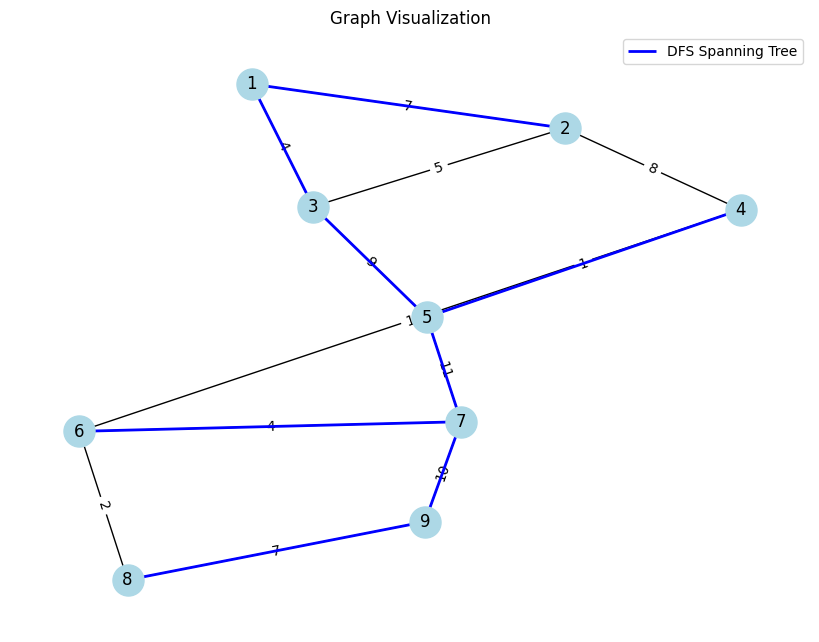

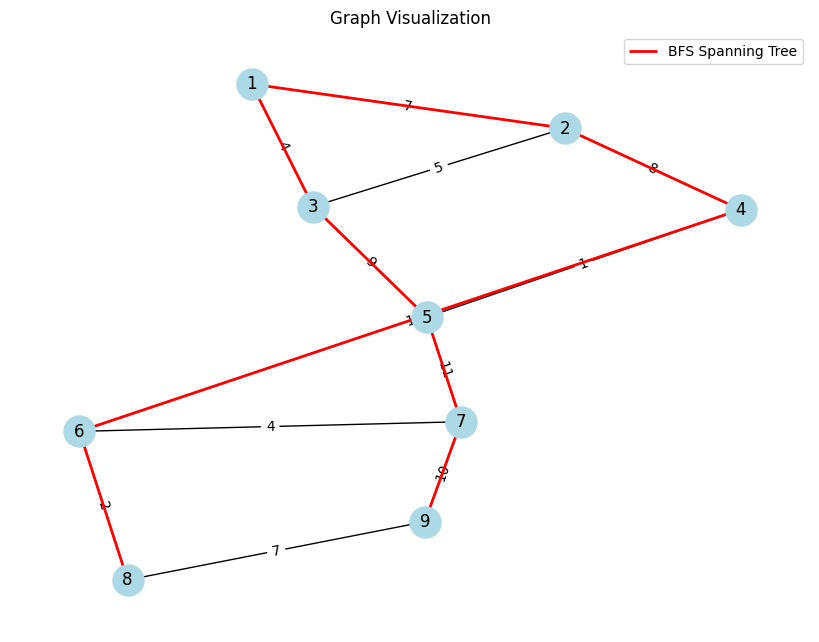

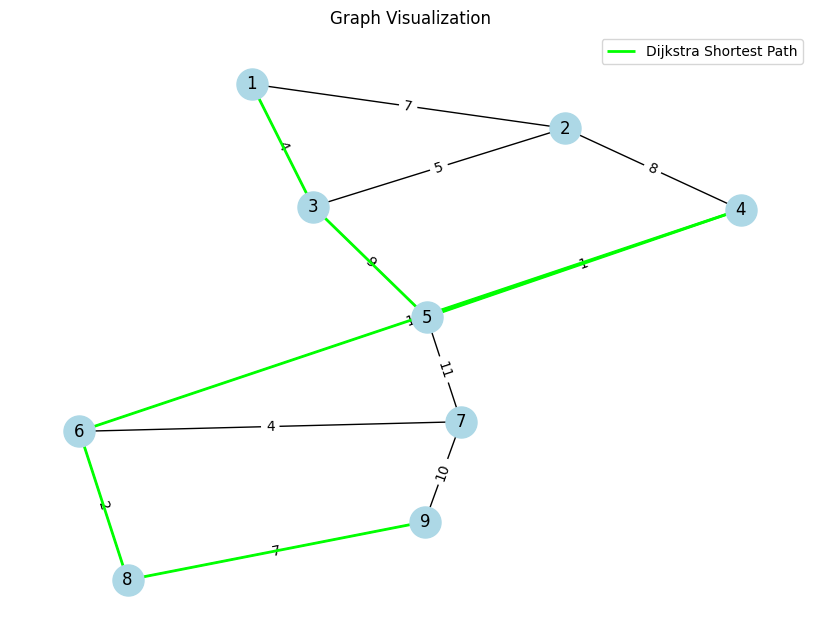

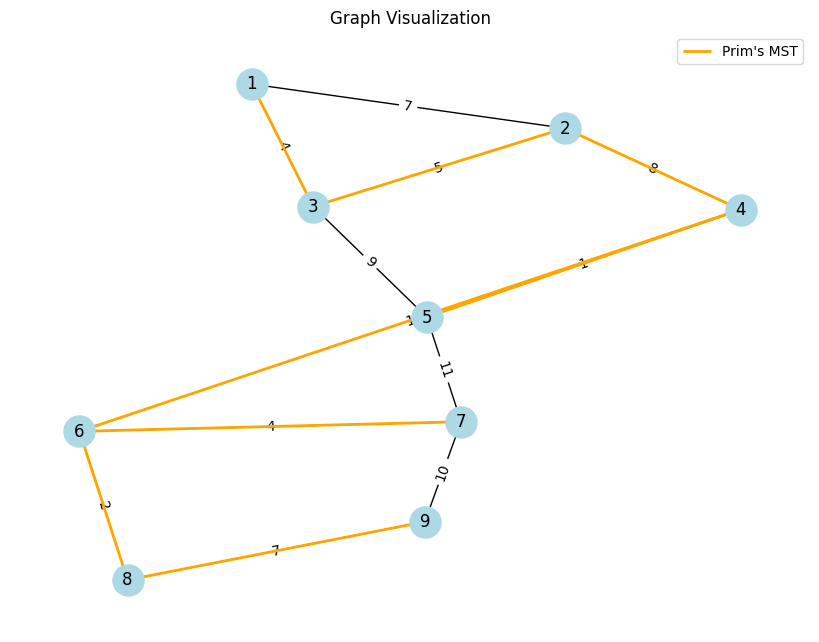

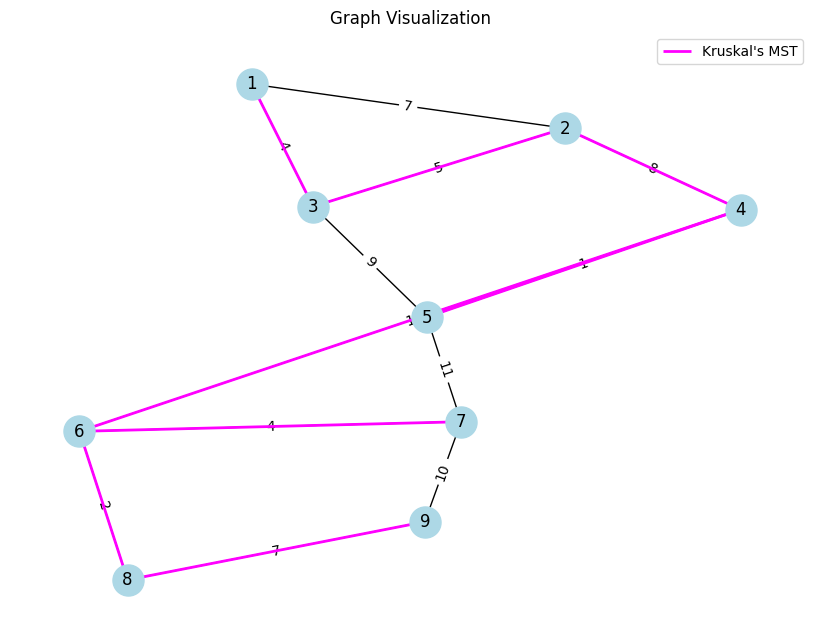

In [ ]:
draw_graph(G,dfs_edges=dfs_spanning_tree_edges, file="graph.png")
draw_graph(G,bfs_edges=bfs_spanning_tree_edges, file="graph.png")
draw_graph(G,dijkstra_edges=dijkstra_edges, file="graph.png")
draw_graph(G, prim_edges=prim_mst_edges, file="graph.png")
draw_graph(G, kruskal_edges=kruskal_mst_edges, file="graph.png")